# Customer Churn Prediction Project  
Predict which customers are likely to churn using machine learning.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE


## Problem Statement
Customer churn is when a subscriber stops using a service...


In [ ]:
import os
os.listdir()

['.config',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv',
 'archive.zip',
 'sample_data']

In [ ]:
import zipfile

with zipfile.ZipFile("archive.zip", "r") as zip_ref:
    zip_ref.extractall()



In [ ]:
import pandas as pd

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df['Churn'].value_counts()


,count
Churn,
No,5174
Yes,1869


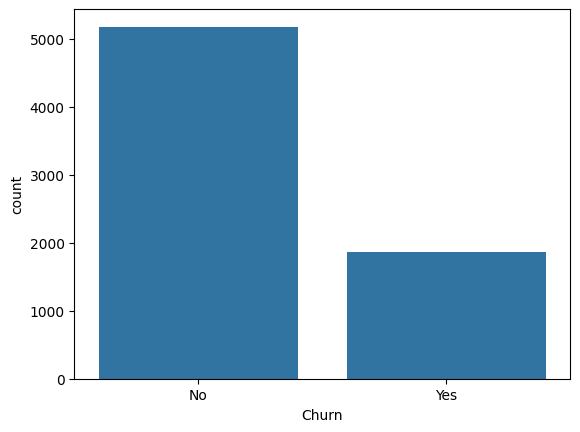

In [ ]:
sns.countplot(x='Churn', data=df)
plt.show()


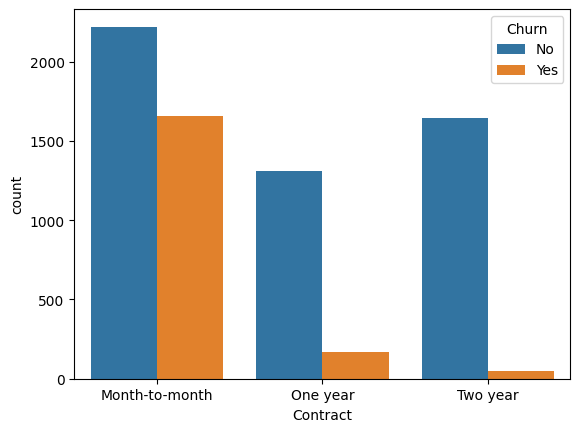

In [ ]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.show()

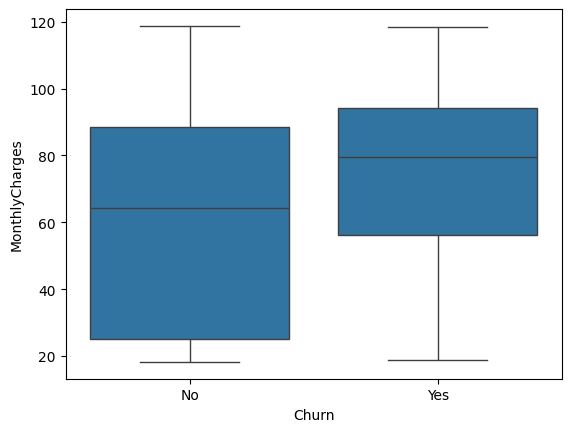

In [ ]:
sns.boxplot(x='Churn',y='MonthlyCharges',data=df)
plt.show()

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna()


In [ ]:
df = pd.get_dummies(df, drop_first=True)


In [ ]:
X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)



In [ ]:
y_pred = model.predict(X_test_scaled)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm


array([[985,  48],
       [263, 111]])

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.79      0.95      0.86      1033
        True       0.70      0.30      0.42       374

    accuracy                           0.78      1407
   macro avg       0.74      0.63      0.64      1407
weighted avg       0.77      0.78      0.74      1407



In [ ]:
!pip install imbalanced-learn


In [ ]:
from imblearn.over_sampling import SMOTE


In [ ]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)


In [ ]:
import pandas as pd

pd.Series(y_train_smote).value_counts()


,count
Churn_Yes,
True,4130
False,4130


In [ ]:
model_smote = LogisticRegression(max_iter=1000)
model_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = model_smote.predict(X_test_scaled)
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred_smote))
print(classification_report(y_test, y_pred_smote))



[[952  81]
 [222 152]]
              precision    recall  f1-score   support

       False       0.81      0.92      0.86      1033
        True       0.65      0.41      0.50       374

    accuracy                           0.78      1407
   macro avg       0.73      0.66      0.68      1407
weighted avg       0.77      0.78      0.77      1407



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train_smote, y_train_smote)
y_pred_rf = rf_model.predict(X_test_scaled)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Confusion Matrix:
[[898 135]
 [171 203]]

Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.84      0.87      0.85      1033
        True       0.60      0.54      0.57       374

    accuracy                           0.78      1407
   macro avg       0.72      0.71      0.71      1407
weighted avg       0.78      0.78      0.78      1407



In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

comparison = pd.DataFrame({
    "Model": ["Logistic Regression (SMOTE)", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_smote),
        accuracy_score(y_test, y_pred_rf)
    ],
    "Recall (Churn)": [
        recall_score(y_test, y_pred_smote),
        recall_score(y_test, y_pred_rf)
    ],
    "F1 Score": [
        f1_score(y_test, y_pred_smote),
        f1_score(y_test, y_pred_rf)
    ]
})

comparison


,Model,Accuracy,Recall (Churn),F1 Score
0,Logistic Regression (SMOTE),0.784648,0.406417,0.500824
1,Random Forest,0.782516,0.542781,0.570225


In [ ]:
import pandas as pd

feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
})

feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

feature_importance.head(10)


,Feature,Importance
1,tenure,0.087524
3,TotalCharges,0.072554
2,MonthlyCharges,0.062768
7056,Contract_Two year,0.037651
7044,OnlineSecurity_Yes,0.035053
7041,InternetService_Fiber optic,0.029870
7050,TechSupport_Yes,0.028647
7059,PaymentMethod_Electronic check,0.026741
7057,PaperlessBilling_Yes,0.023413
7055,Contract_One year,0.023086


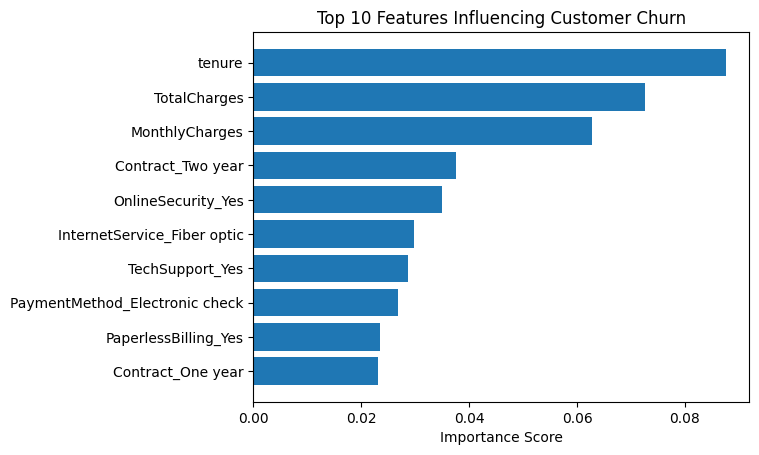

In [ ]:
import matplotlib.pyplot as plt

top_features = feature_importance.head(10)

plt.figure()
plt.barh(top_features["Feature"], top_features["Importance"])
plt.gca().invert_yaxis()
plt.title("Top 10 Features Influencing Customer Churn")
plt.xlabel("Importance Score")
plt.show()


Business Insights:
1. Customers with shorter tenure are more likely to churn, indicating poor early engagement.
2. High monthly charges significantly increase churn probability.
3. Customers on month-to-month contracts churn more than long-term contract users.
4. Payment method also plays a role, with electronic check users showing higher churn.

Recommendations:
- Improve onboarding experience for new customers.
- Offer discounts or incentives for long-term contracts.
- Introduce loyalty pricing for high-paying customers.